In [11]:
import pandas as pd
import re
import numpy as np

from sklearn.decomposition import PCA, TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
# from sklearn.semi_supervised import LabelSpreading
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVR, SVC
from sklearn.cluster import DBSCAN
from sklearn.metrics import jaccard_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
from pymystem3 import Mystem
nltk.download('wordnet')
# from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context


In [7]:
pulse_processed_df = pd.read_csv("pulse_processed.csv")

In [8]:
pulse_processed_df = pulse_processed_df.dropna()

In [9]:
def test_model(model, X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    score = []
    roc_auc = []
    train_score = []
    train_roc_auc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        train_preds = model.predict(X_train)
        score.append(f1_score(y_test, preds))
        roc_auc.append(roc_auc_score(y_test, preds))
        train_score.append(f1_score(y_train, train_preds))
        train_roc_auc.append(roc_auc_score(y_train, train_preds))
        
    return score, roc_auc, train_score, train_roc_auc

In [10]:
df = pulse_processed_df

In [12]:
def prepare_data(d, vectorizer):
    msg = vectorizer.fit_transform(d['message']).toarray()
    df_features = df.copy()
    df_features = df_features[['n_words', 'caps_lock', 'mentions', 'actions', 'length', 'message_grammar', 'pr1', 'pr2', 'pr3', 'pr4', 'pr5', 'pr6']]
    for i in range(msg.shape[1]):
        df_features['msg' + str(i)] = msg[:, i]
    return df_features

In [16]:
def test_model_and_vec(model, vec, d, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    X = prepare_data(d, vec)
    X = np.array(X)
    
#     print(X.shape)

    y = d['label'].astype(float).values
#     print(list(y))
    score = []
    roc_auc = []
    train_score = []
    train_roc_auc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        train_preds = model.predict(X_train)
        score.append(f1_score(y_test, preds))
        roc_auc.append(roc_auc_score(y_test, preds))
        train_score.append(f1_score(y_train, train_preds))
        train_roc_auc.append(roc_auc_score(y_train, train_preds))
        
    return score, roc_auc, train_score, train_roc_auc

In [10]:
test_model_and_vec(RandomForestClassifier(),
                   TfidfVectorizer(max_features=30, stop_words=stopwords.words('russian')),
                   df)

([0.0875912408759124,
  0.08540925266903913,
  0.12676056338028172,
  0.09059233449477351,
  0.04395604395604395],
 [0.5237352427587395,
  0.523252887934763,
  0.5366348974183553,
  0.5250723458129861,
  0.5102444030290878],
 [0.8850506253722454,
  0.8779035139964264,
  0.8820391227030232,
  0.8868035190615836,
  0.8807985907222549],
 [0.9068982617345696,
  0.9030728269621012,
  0.9068876659172848,
  0.9133473458696355,
  0.9099867674077854])

In [31]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300)
test_model_and_vec(clf, TfidfVectorizer(max_features=1000, stop_words=stopwords.words('russian')), df)

C:\ProgramData\Anaconda3\envs\ysda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


([0.30701754385964913,
  0.3444730077120823,
  0.2690058479532163,
  0.3539445628997868,
  0.25531914893617025],
 [0.6411080035602702,
  0.6399075624965597,
  0.5957972587227819,
  0.6702141671974648,
  0.5977926663363923],
 [0.8384279475982531,
  0.8477777777777777,
  0.8227040816326531,
  0.7877013177159591,
  0.8186274509803921],
 [0.9182138447867764,
  0.9155372922171467,
  0.8530443369779047,
  0.9358049078216963,
  0.8648744208874237])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

text_clf = MultinomialNB(alpha=1)

test_model_and_vec(text_clf, TfidfVectorizer(norm='l2', use_idf=True, stop_words=stopwords.words('russian')), df)

In [12]:
from pprint import pprint as pp

In [18]:
models = [
    GaussianNB(),
#     KNeighborsClassifier(),
#     GradientBoostingClassifier(),
#     RandomForestClassifier(random_state=0),
#     LogisticRegression()
]
vecs = [
#     TfidfVectorizer(max_features=1000, stop_words=stopwords.words('russian')),
    TfidfVectorizer(max_features=4000, stop_words=stopwords.words('russian')),
    TfidfVectorizer(max_features=8000, stop_words=stopwords.words('russian')),
    TfidfVectorizer(max_features=12000, stop_words=stopwords.words('russian')),
]

for v in vecs:
    for model in models:
        print('===============================')
        print('===============================')
        print('===============================')
        print('===============================')
        print(v, model)
        score, roc_auc, train_score, train_roc_auc = test_model_and_vec(model, v, df)
        pp(list(zip(score, train_score)))
        pp(list(zip(roc_auc, train_roc_auc)))
        

TfidfVectorizer(max_features=4000,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...]) GaussianNB()
[(0.22870299309286266, 0.3268231499731231),
 (0.20977011494252873, 0.31406948744410046),
 (0.22450592885375492, 0.3269471799462847),
 (0.2116477272727273, 0.30834177642688276),
 (0.2145377558221595, 0.3128319342127805)]
[(0.7562151379343648, 0.929833408038249),
 (0.7441258345325439, 0.9255164170184155),
 (0.7445426093247461, 0.9297934331926337),
 (0.7497336179983801, 0.9234993089537186),
 (0.7558643358733004, 0.925086847708341)]
TfidfVectorizer(max_features=8000,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                       

In [30]:
models = [
#     GaussianNB(),
#     KNeighborsClassifier(),
#     GradientBoostingClassifier(),
#     RandomForestClassifier(random_state=0),
    RandomForestClassifier(criterion='entropy', n_jobs=-1)
#     LogisticRegression()
]
vecs = [
    TfidfVectorizer(max_features=1000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=4000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=8000, stop_words=stopwords.words('russian')),
#     TfidfVectorizer(max_features=12000, stop_words=stopwords.words('russian')),
]

for v in vecs:
    for model in models:
        print('===============================')
        print('===============================')
        print('===============================')
        print('===============================')
        print(v, model)
        score, roc_auc, train_score, train_roc_auc = test_model_and_vec(model, v, df)
        pp(list(zip(score, train_score)))
        pp(list(zip(roc_auc, train_roc_auc)))
        

TfidfVectorizer(max_features=1000,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...]) RandomForestClassifier(n_jobs=-1)
[(0.21221864951768488, 0.9623059866962306),
 (0.26168224299065423, 0.9660545353366722),
 (0.22857142857142856, 0.9656319290465633),
 (0.21262458471760798, 0.966740576496674),
 (0.2662337662337662, 0.9660922734852695)]
[(0.5683913138806161, 0.9754289634889555),
 (0.588295312463139, 0.9750571385074734),
 (0.5751374177262969, 0.9766253661792486),
 (0.5671125370575699, 0.977191688231732),
 (0.586998788994, 0.9755861067069068)]
TfidfVectorizer(max_features=1000,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
        

In [24]:
clf.cv_results_

{'mean_fit_time': array([ 43.15138979,  63.85568862, 106.96344376,  38.47137718,
         58.8028172 ,  62.94210825]),
 'std_fit_time': array([2.98111799, 2.89388121, 1.68843697, 0.84917034, 4.10973989,
        5.6629758 ]),
 'mean_score_time': array([0.52870736, 0.59727302, 0.57439876, 0.50002456, 0.46710553,
        0.24799123]),
 'std_score_time': array([0.01569388, 0.03377648, 0.11295477, 0.04012577, 0.10853171,
        0.06351297]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 5, 10, 3, 5, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'max_depth': 3},
  {'criterion': 'gini', 'max_depth': 5},
  {'criterion': 'gini', 'max_depth': 10},
  {'criterion': '

(array([660., 288., 103.,  36.,  18.,  10.,   6.,   8.,   7.,   5.]),
 array([  3. ,  47.7,  92.4, 137.1, 181.8, 226.5, 271.2, 315.9, 360.6,
        405.3, 450. ]),
 <BarContainer object of 10 artists>)

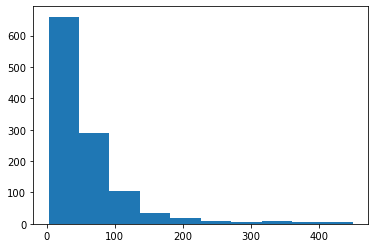

In [79]:
from matplotlib import pyplot as plt

plt.hist(pulse[pulse['label'] == 1]['mean_length'])

(array([ 8353., 10307.,  6139.,  3432.,  2129.,  1214.,   767.,   495.,
          366.,   264.]),
 array([  3. ,  52.7, 102.4, 152.1, 201.8, 251.5, 301.2, 350.9, 400.6,
        450.3, 500. ]),
 <BarContainer object of 10 artists>)

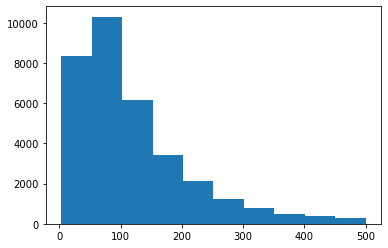

In [80]:
plt.hist(pulse[pulse['label'] == 0]['mean_length'])